In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Load the data
df = pd.read_csv('vgsales.csv')
df.drop('Rank', axis=1, inplace=True)
df.sample(n=5) # Display 5 random rows

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
5159,The Sims 2: Castaway,PS2,2007.0,Simulation,Electronic Arts,0.30,0.01,0.00,0.05,0.37
4781,Disney Sing It! High School Musical 3: Senior ...,PS3,2008.0,Misc,Disney Interactive Studios,0.08,0.26,0.00,0.07,0.40
6205,UEFA Euro 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0.00,0.21,0.03,0.03,0.28
12168,Disney's Party,GBA,2003.0,Misc,Hudson Entertainment,0.05,0.02,0.00,0.00,0.07


In [3]:
# Data exploration and description
print(df.info())  # Display data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB
None


In [4]:
# Setting the general style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

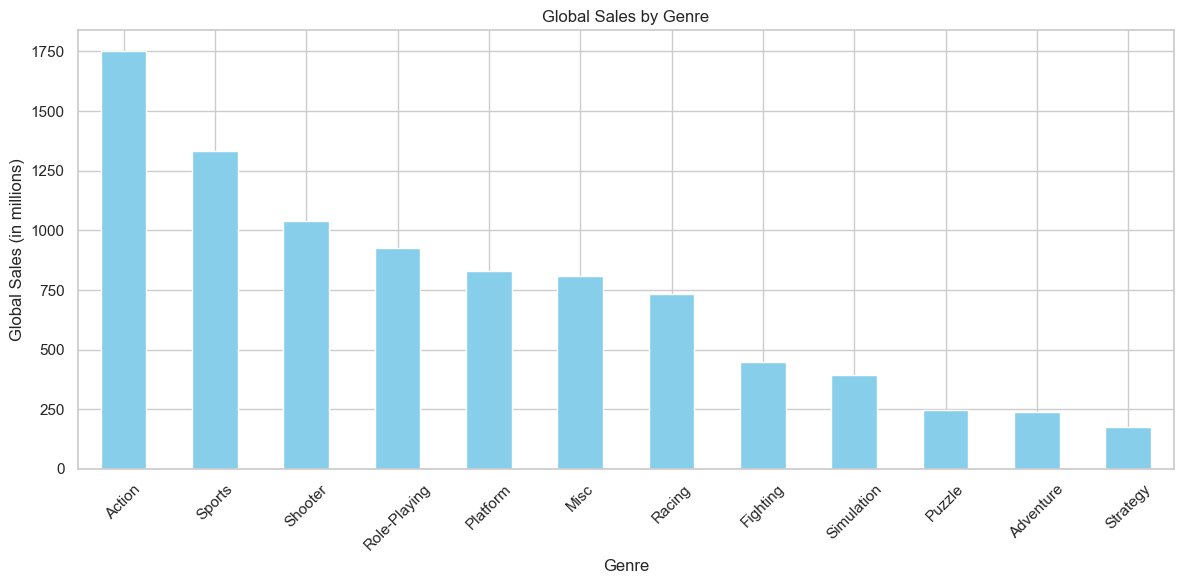

In [5]:
# Game Sales by Genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure()
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Global Sales by Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

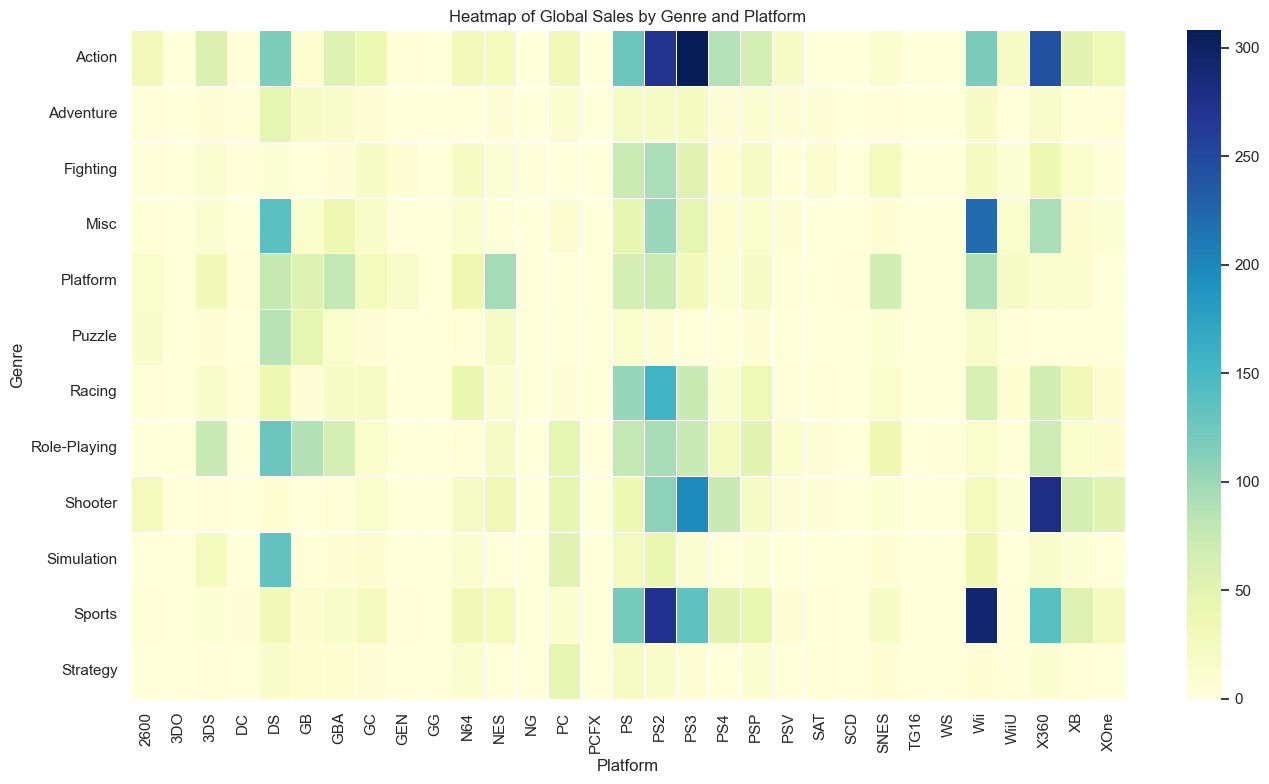

In [6]:
# Heatmap of Sales by Genre and Platform
heatmap_data = df.pivot_table(values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Global Sales by Genre and Platform')
plt.tight_layout()
plt.show()

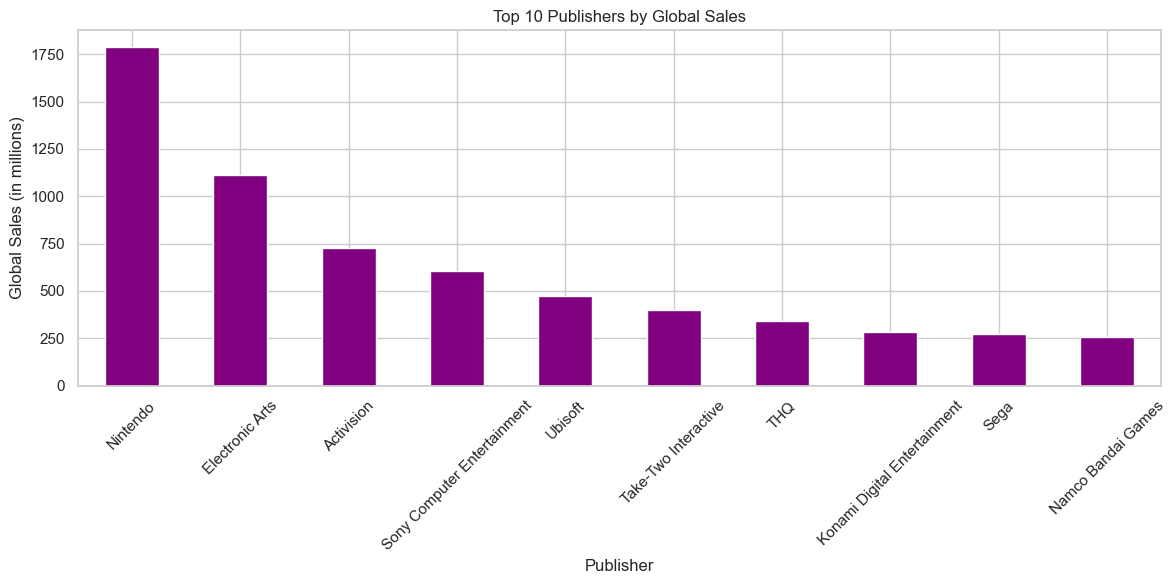

In [7]:
# Top 10 Best-Selling Publishers
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_publishers.plot(kind='bar', color='purple')
plt.title('Top 10 Publishers by Global Sales')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

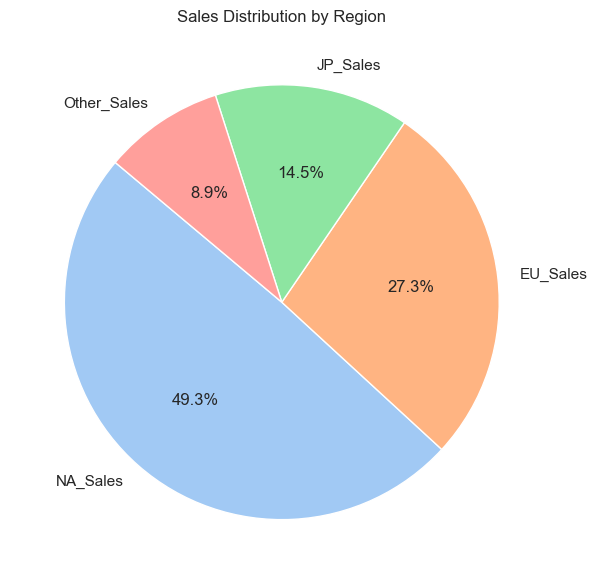

In [8]:
# Sales Distribution by Region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure()
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [9]:
df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre', 'Name', 'Publisher'])

In [10]:
# Select features
features = ['Platform', 'Genre', 'Publisher', 'Year']
target = 'Global_Sales'

# Select X and y
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean cross-validation R^2 score:", scores.mean())

Mean Squared Error: 0.7980252581686742
R^2 Score: 0.810055671767014
Mean cross-validation R^2 score: 0.9545097749262691


In [18]:
# Display predicted vs actual values for first 10 test samples
for i in range(10):
    print(f"Sample {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test.iloc[i]:.2f}")

Sample 1: Predicted = 0.15, Actual = 0.15
Sample 2: Predicted = 0.40, Actual = 0.40
Sample 3: Predicted = 0.02, Actual = 0.02
Sample 4: Predicted = 0.02, Actual = 0.03
Sample 5: Predicted = 0.37, Actual = 0.36
Sample 6: Predicted = 2.15, Actual = 2.24
Sample 7: Predicted = 0.40, Actual = 0.39
Sample 8: Predicted = 0.64, Actual = 0.65
Sample 9: Predicted = 0.21, Actual = 0.21
Sample 10: Predicted = 0.44, Actual = 0.44
